#Simple linear Regression lagi

### import library

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [3]:
dataset = pd.read_csv('merkhp2.csv')
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[8 2 6 7 4 4 7 3]


In [5]:
print(y)

[ 7.  3.  7. nan  2. nan  8.  3.]


In [6]:
x_train = []
i = 0
for i in range(len(x)): 
  if i != 3 and i != 5:
    x_train.append(x[i])

  i = i + 1

print(x_train)

[8, 2, 6, 4, 7, 3]


In [7]:
y_train = []
i = 0
for i in range(len(y)): 
  if i != 3 and i != 5:
    y_train.append(y[i])

  i = i + 1

print(y_train)

[7.0, 3.0, 7.0, 2.0, 8.0, 3.0]


In [8]:
x_test = []
x_test.append(x[3])
x_test.append(x[5])

In [9]:
x_test

[7, 4]

In [10]:
y_test = []
y_test.append(y[3])
y_test.append(y[5])

In [11]:
y_test

[nan, nan]

### mencari nilai gradien, m, slope

###  rumus gradien (m) adalah r * (Standar dev Y / standar dev X)

### rumus r = Σ((x - xmean)(y - ymean)) / √Σ(x - xmean)kuadrat * Σ(y - ymean)kuadrat


In [12]:
Xmean = sum(x_train) / len(x_train)
print(Xmean)

5.0


In [13]:
Ymean = sum(y_train) / len(y_train)
print(Ymean)

5.0


In [14]:
# menghitung nilai r (coefficient correlation)
r_pembilang = sum((x_train - Xmean) * (y_train - Ymean)) 
# tidak perlu di tunjuk satu persatu elemen dari x_train, akan otomatis semua elemen akan dikurangi Xmean
r_penyebut = pow(sum(pow((x_train - Xmean),2)) * sum(pow((y_train - Ymean),2)),0.5)

In [15]:
print(r_pembilang)
print(r_penyebut)

27.0
30.854497241083024


In [16]:
r = r_pembilang / r_penyebut
print(r)

0.8750750267954219


## Mencari nilai Standari deviasi dari y

In [17]:
Sy = pow(sum(pow(y_train - Ymean,2)) / (len(y_train) - 1),0.5)
print(Sy)

2.6076809620810595


## Mencari nilai standar deviasi dari x

In [18]:
Sx = pow(sum(pow(x_train - Xmean,2)) / (len(x_train) - 1),0.5)
print(Sx)

2.3664319132398464


## memasukkan ke formula mencari gradien m

In [19]:
m = r * (Sy / Sx)
print(m)

0.9642857142857144


# mencari nilai c atau intercept pada sumbu Y

In [ ]:
c = Ymean - (m * Xmean)
print(c)

0.17857142857142794


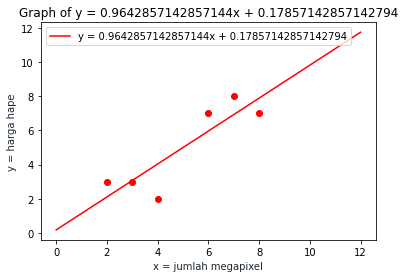

In [ ]:
x = np.linspace(0,12, 20)
y = m * x + c
plt.plot(x, y, '-r', label="y = {m}x + {c}".format(m = m, c = c))
plt.plot(x_train, y_train, 'ro')

plt.title("Graph of y = {m}x + {c}".format(m = m, c = c))
plt.xlabel('x = jumlah megapixel', color='#1C2833')
plt.ylabel('y = harga hape', color='#1C2833')
plt.legend(loc='upper left')

plt.show()

### jika sudah mendapat persamaan linear berarti sudah bisa menebak harga kamera x megapiksel yang masih kosong


In [ ]:
print(x_test)  # ini adalah megapiksel kamera hp yang harganya belum ditentukan

[7, 4]


In [ ]:
print(y_test)  # ini adalah harga yang masih kosong dan ingin ditebak

[nan, nan]


In [ ]:
y_test[0] = m * x_test[0] + c # menebak x_test elemen pertama
print(y_test)

[6.928571428571429, nan]


In [ ]:
y_test[1] = m * x_test[1] + c # menebak x_test elemen kedua
print(y_test)

[6.928571428571429, 4.035714285714286]


### kita sudah berhasil menebak harga tersebut mari kita masukkan ke graph

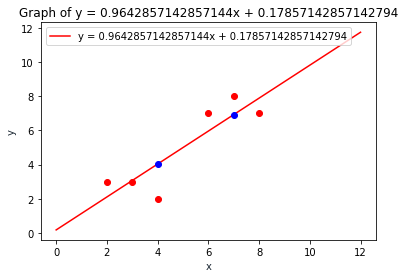

In [ ]:
x = np.linspace(0,12, 20)
y = m * x + c
plt.plot(x, y, '-r', label="y = {m}x + {c}".format(m = m, c = c))
plt.plot(x_train, y_train, 'ro') # titik merah merepresentasikan data train
plt.plot(x_test, y_test, 'bo') # titik merah merepresentasikan data test yang sudah berhasil ditebak secara tepat

plt.title("Graph of y = {m}x + {c}".format(m = m, c = c))
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')

plt.show()

## kita sudah mengetahui harga optimal untuk setiap besaran megapixel kamera. Selanjutnya mencari dari train set hape dengan megapixel mana yang dijual lebih mahal dan lebih murah dari prediksi harga optimal

In [ ]:
# mengeluarkan harga optimal tiap megapixel berdasarkan 
#regresi linear yang ditemukan
i = 0
for x in x_train:
  y = m * x + c
  print("Untuk hp dengan kamera {besaran} megapixel".format(besaran = x_train[i]))
  print("Harga optimal berdasarkan regresi linear adalah {hargaoptimal}".format(hargaoptimal = y) )
  print("Sementara harga asli adalah {hargaasli}".format(hargaasli = y_train[i]) )
  print(" ")
  i = i +1

Untuk hp dengan kamera 8 megapixel
Harga optimal berdasarkan regresi linear adalah 7.892857142857143
Sementara harga asli adalah 7.0
 
Untuk hp dengan kamera 2 megapixel
Harga optimal berdasarkan regresi linear adalah 2.1071428571428568
Sementara harga asli adalah 3.0
 
Untuk hp dengan kamera 6 megapixel
Harga optimal berdasarkan regresi linear adalah 5.964285714285714
Sementara harga asli adalah 7.0
 
Untuk hp dengan kamera 4 megapixel
Harga optimal berdasarkan regresi linear adalah 4.035714285714286
Sementara harga asli adalah 2.0
 
Untuk hp dengan kamera 7 megapixel
Harga optimal berdasarkan regresi linear adalah 6.928571428571429
Sementara harga asli adalah 8.0
 
Untuk hp dengan kamera 3 megapixel
Harga optimal berdasarkan regresi linear adalah 3.071428571428571
Sementara harga asli adalah 3.0
 
